In [ ]:
from google.colab import files
uploaded = files.upload()

EXTRACTION DU FICHIER ZIP

In [ ]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('destination_dossier')

IMPORTATION DES BIBLIOTHEQUES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import seaborn as sns
%matplotlib inline

Prétraitement des Données

LE CHEMAIN D'ACCES AU JEU DE DONNEES

In [ ]:
train_path = '/content/destination_dossier/Training'
test_path = '/content/destination_dossier/Testing'

chargement des données

In [ ]:
#le chargement de notre data
X_train = []
y_train = []
img_size = (200,200)
#le chargement du data contenu dans training
for folder in os.listdir(train_path):
  print(f"In folder: {folder}")
  for file in os.listdir(os.path.join(train_path, folder)):
    img_path = os.path.join(train_path, folder, file)
    img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)  # Resize the image
    # Reshape the image to flatten the pixel data into a 2D array
    img = img.flatten()
    X_train.append(img)
    y_train.append(folder)
#le chargement du data contenu dans testing
for folder in os.listdir(test_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        # Reshape the image to flatten the pixel data into a 2D array
        img = img.flatten()
        X_train.append(img)
        y_train.append(folder)

In folder: meningioma_tumor
In folder: no_tumor
In folder: glioma_tumor
In folder: pituitary_tumor
In folder: meningioma_tumor
In folder: no_tumor
In folder: glioma_tumor
In folder: pituitary_tumor


Conversion des listes en tableaux NumPy et vérification de la taille des données

In [ ]:
#Convertir des listes en tableaux numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
#le nombre d'elemnet dans chaque liste
print(len(X_train))
print(len(y_train))

3264
3264


Augmentation des données

In [ ]:
# Fonction pour effectuer une augmentation de données
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for i in range(len(images)):
        img = images[i].reshape((img_size[0], img_size[1], 3))  # Remettre l'image à sa forme d'origine
        # Rotation aléatoire entre -10 et 10 degrés
        angle = random.randint(-10, 10)
        rotation_matrix = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1.0)
        rotated_image = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
        rotated_image = cv2.resize(rotated_image, (img_size[0], img_size[1]))  # Redimensionner à la taille originale
        augmented_images.append(rotated_image.flatten())
        augmented_labels.append(labels[i])

        # Translation aléatoire horizontale et verticale de -10 à 10 pixels
        dx = random.randint(-10, 10)
        dy = random.randint(-10, 10)
        translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
        translated_image = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))
        translated_image = cv2.resize(translated_image, (img_size[0], img_size[1]))  # Redimensionner à la taille originale
        augmented_images.append(translated_image.flatten())
        augmented_labels.append(labels[i])

        # Retournement horizontal
        flipped_image = cv2.flip(img, 1)
        flipped_image = cv2.resize(flipped_image, (img_size[0], img_size[1]))  # Redimensionner à la taille originale
        augmented_images.append(flipped_image.flatten())
        augmented_labels.append(labels[i])

        # Changement d'échelle aléatoire entre 0.8 et 1.2
        scale_factor = random.uniform(0.8, 1.2)
        scaled_image = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
        scaled_image = cv2.resize(scaled_image, (img_size[0], img_size[1]))  # Redimensionner à la taille originale
        augmented_images.append(scaled_image.flatten())
        augmented_labels.append(labels[i])

    return np.array(augmented_images), np.array(augmented_labels)

# Appel de la fonction d'augmentation
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)

# Vérification de la taille des données augmentées
print("Taille des données augmentées :", X_train_augmented.shape)
print("Taille des étiquettes augmentées :", y_train_augmented.shape)

Taille des données augmentées : (13056, 120000)
Taille des étiquettes augmentées : (13056,)


Analyse des données

In [ ]:
#l'analyse de donnees
print("Forme de X_train :", X_train_augmented.shape)  # Affiche la forme du tableau d'images
print("Forme de y_train :",  y_train_augmented.shape)  # Affiche la forme du tableau d'étiquettes

Forme de X_train : (13056, 120000)
Forme de y_train : (13056,)


Analyse des étiquettes

In [ ]:
# Analyse des étiquettes
classes, counts = np.unique(y_train_augmented, return_counts=True)
print("Classes :", classes)  # Affiche les classes d'étiquettes
print("Nombre d'échantillons par classe :", counts)  # Affiche le nombre d'échantillons par classe

Classes : ['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']
Nombre d'échantillons par classe : [3704 3748 2000 3604]


Visualisation des données

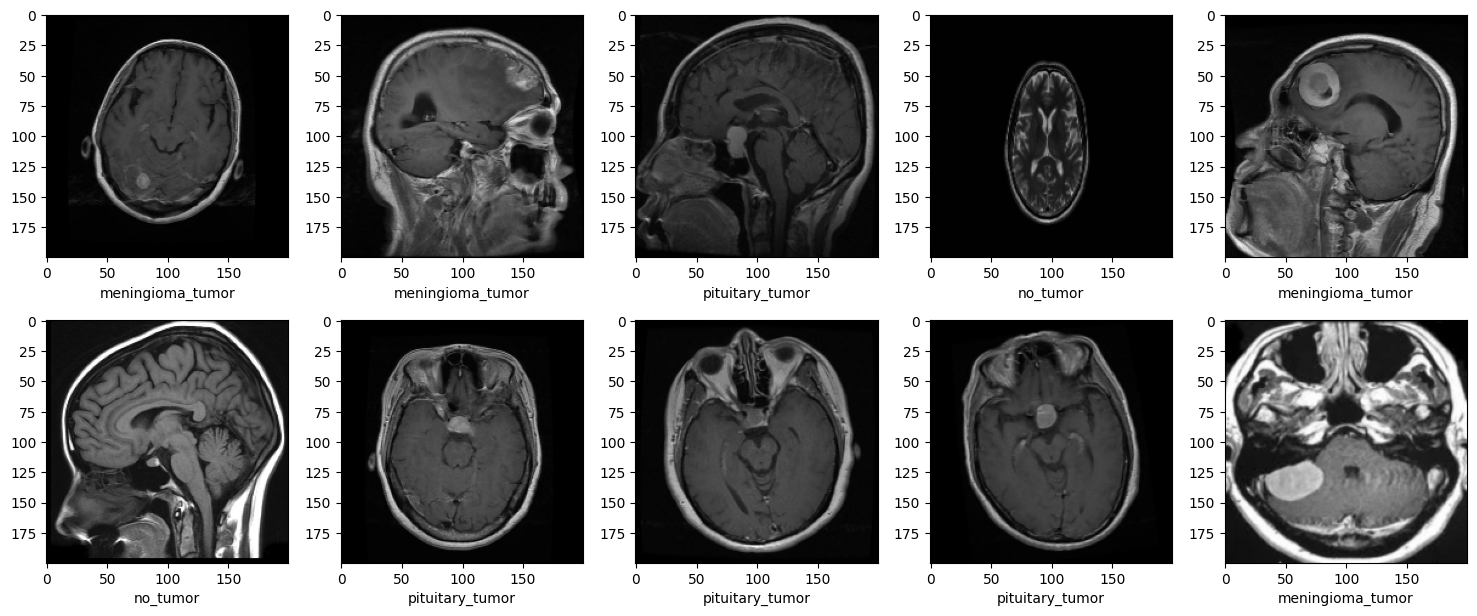

In [ ]:
# ... your existing code for loading and flattening images ...
#Visualisation des données
plt.figure(figsize=(15, 15))
random_indices = np.random.choice(len(X_train_augmented), size=10, replace=False) #Cette ligne génère un échantillon aléatoire de 10 indices à partir X_train
for i, idx in enumerate(random_indices):
  plt.subplot(5, 5, i + 1)  # Create a subplot
  img = X_train_augmented[idx].reshape((img_size[0], img_size[1], 3))  # Reshape to 2D (height, width, channels)
  plt.imshow(img)  # Display the image
  plt.xlabel(y_train_augmented[idx])  # Set the x-axis label
  plt.tight_layout()  # Adjust spacing between subplots

plt.show()  # Display the figure

Visualisation de la distribution des classes

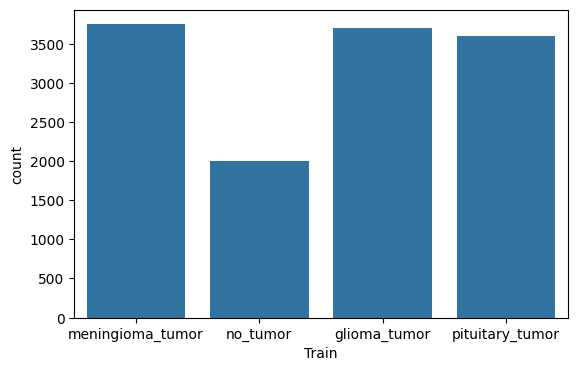

In [ ]:
#la distribution des classes dans l'ensemble de données d'entraînement
plt.figure(figsize = (14,4));
lis = ['Train']
for i,j in enumerate([y_train_augmented]):
    plt.subplot(1,2, i+1)
    sns.countplot(x = j)
    plt.xlabel(lis[i])

Division des données en ensembles d'entraînement et de test

In [ ]:
#Préparation des Données
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=101)

In [ ]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(y_test).shape}\n')

X_train shape: (10444, 120000)
y_train shape: (10444,)
X_test shape: (2612, 120000)
y_test shape: (2612,)



Visualisation de la distribution des classes dans les ensembles d'entraînement et de test

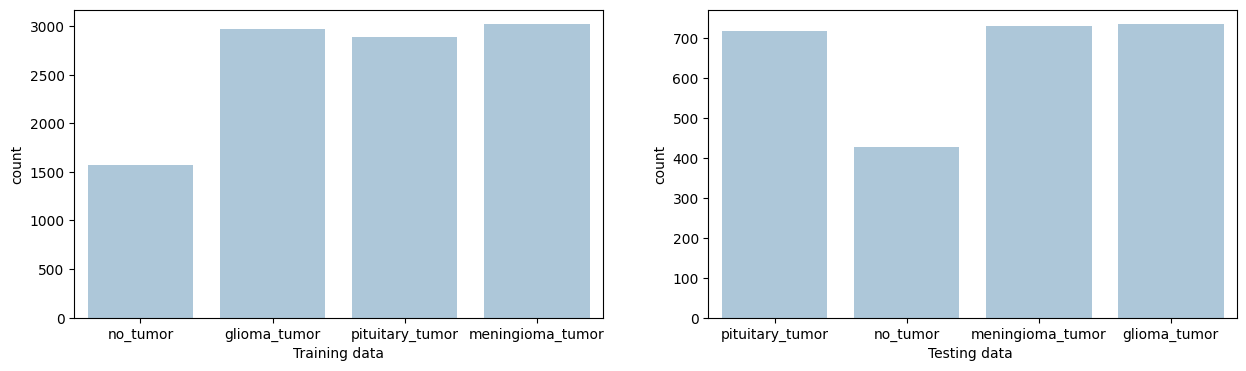

In [ ]:
plt.figure(figsize = (15,4));
lis = ['Training data', 'Testing data ']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j,alpha=0.4 );
    plt.xlabel(lis[i])

Normalisation des données

In [ ]:
#normalisation du data
# Normalize pixel values of training images to the range [0,1]
print( X_train.min() , X_train.max())
print(X_test.min() ,X_test.max())
X_train= X_train/255
X_test= X_test/255
print(X_train.min() ,X_train.max() )
print(X_test.min() ,X_test.max())

0 255
0 255
0.0 1.0
0.0 1.0


Réduction de dimensionnalité avec PCA

In [ ]:
from sklearn.decomposition import PCA
# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Recherche de grille pour les hyperparamètres SVM

In [ ]:
# Grid Search for SVM Hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

Initialisation du classificateur SVM

In [ ]:
# Importation de la classe SVC (Support Vector Classifier) depuis scikit-learn
from sklearn.svm import SVC
svm = SVC()

Initialisation de GridSearchCV pour la recherche des meilleurs hyperparamètres

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=3)

Exécution de la recherche des meilleurs hyperparamètres avec GridSearchCV

In [ ]:
grid.fit(X_train_pca, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  44.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  44.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  43.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.4min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  53.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  56.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  56.5s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  43.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  41.9s
[CV] END ....................C=0.1, gamma=0.1, k

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

Affichage des meilleurs paramètres trouvés par GridSearchCV

In [ ]:
# Best Parameters
print(f"Best parameters found: {grid.best_params_}")

Best parameters found: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}


Évaluation de la performance du meilleur modèle SVM sur l'ensemble de test

In [ ]:
from sklearn.metrics import accuracy_score
# Best Model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9008422664624809


Affichage des scores d'entraînement et de test du meilleur modèle SVM

In [ ]:
# Training and Testing Scores
print("Training Score:", best_svm.score(X_train_pca, y_train))
print("Testing Score:", best_svm.score(X_test_pca, y_test))

Training Score: 1.0
Testing Score: 0.9008422664624809


Sauvegarde du modèle SVM optimal

In [ ]:
import joblib
# Sauvegarde du modèle
joblib.dump(best_svm, 'best_svm_model.joblib')


['best_svm_model.joblib']

In [ ]:
# Chargement du modèle (si besoin)
best_svm = joblib.load('best_svm_model.joblib')

Calcul de la matrice de confusion

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[668  35  15  17]
 [ 62 617  23  28]
 [ 24  16 358  30]
 [  2   7   0 710]]


Affichage graphique de la matrice de confusion

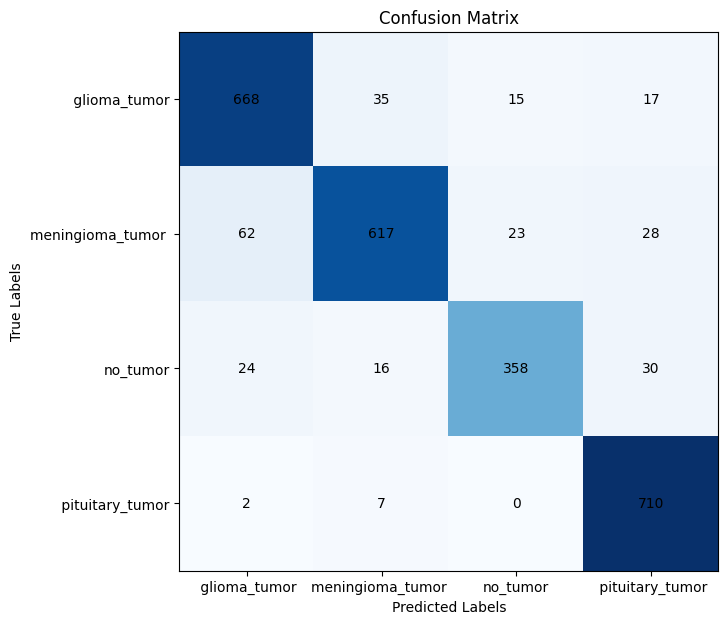

In [ ]:
# Affichage de la matrice de confusion
plt.figure(figsize=(7, 7))
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')


# Ajout des annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(conf_matrix.shape[1]), labels=[' glioma_tumor', 'meningioma_tumor ', 'no_tumor', ' pituitary_tumor'])
plt.yticks(ticks=np.arange(conf_matrix.shape[0]), labels=[' glioma_tumor', 'meningioma_tumor ', 'no_tumor', ' pituitary_tumor'])
plt.show()

Affichage du rapport de classification

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
                   precision    recall  f1-score   support

    glioma_tumor       0.88      0.91      0.90       735
meningioma_tumor       0.91      0.85      0.88       730
        no_tumor       0.90      0.84      0.87       428
 pituitary_tumor       0.90      0.99      0.94       719

        accuracy                           0.90      2612
       macro avg       0.90      0.89      0.90      2612
    weighted avg       0.90      0.90      0.90      2612



Identification des échantillons mal classés

In [ ]:
misclassified=np.where(y_test!=y_pred)
misclassified
print("Total Misclassified Samples: ",len(misclassified[0]))

Total Misclassified Samples:  259


Affichage d'échantillons correctement classifiés

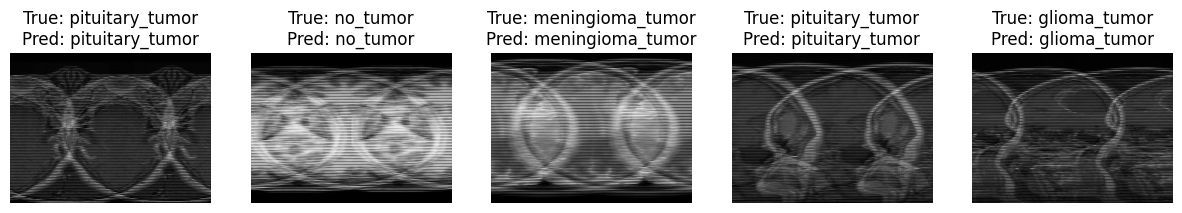

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Indices des échantillons correctement classifiés
correctly_classified_indices = np.where(y_test == y_pred)[0]
num_images_to_show = 5

# Taille des images (ajustez selon vos données)
image_shape = (300, 400)

# Affichage des images correctement classifiées
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))
for i, ax in enumerate(axes):
    if i < len(correctly_classified_indices):
        idx = correctly_classified_indices[i]
        ax.imshow(X_test[idx].reshape(image_shape), cmap='gray')  # Ajustez reshape selon vos données
        ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        ax.axis('off')
plt.show()


Tracé des courbes ROC pour chaque classe

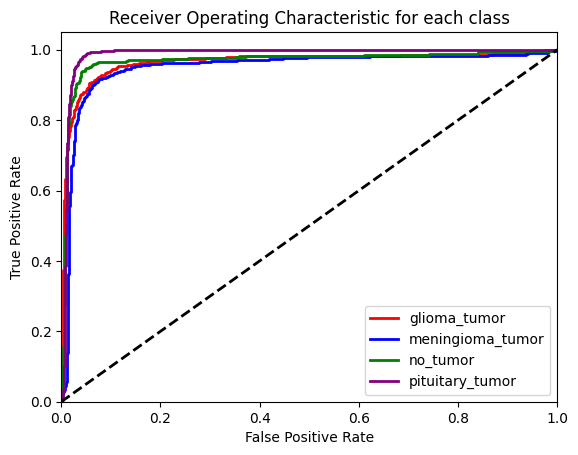

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Binarisation des labels de test
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Utilisation de OneVsRestClassifier avec votre meilleur modèle SVM
classifier = OneVsRestClassifier(best_svm)
y_score = classifier.fit(X_train_pca, y_train).decision_function(X_test_pca)

# Initialisation des variables pour les courbes ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Couleurs pour chaque classe
colors = cycle(['red', 'blue', 'green', 'purple'])

# Calcul des courbes ROC et des aires sous la courbe (AUC) pour chaque classe
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Noms des classes
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Tracé des courbes ROC
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(class_names, loc="lower right")
plt.show()


Tracé des courbes de précision-rappel pour chaque classe et de la courbe de précision-rappel macro

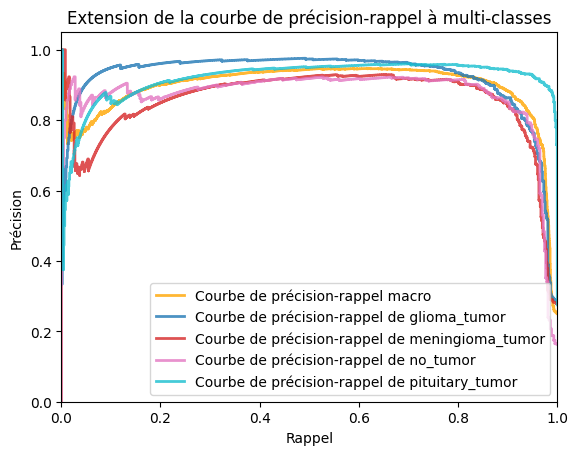

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

# Initialisation des variables
precision = dict()
recall = dict()
average_precision = dict()

# Calcul des courbes de précision-rappel pour chaque classe
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Calcul de la courbe de précision-rappel macro
precision["macro"], recall["macro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
average_precision["macro"] = average_precision_score(y_test_binarized, y_score, average="macro")

# Noms des classes
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Tracé des courbes de précision-rappel
plt.figure()
plt.step(recall['macro'], precision['macro'], where='post', color='orange', alpha=0.8, linestyle='-', linewidth=2, label='Courbe de précision-rappel macro')
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))  # Utilisation d'une palette de couleurs
for i, color in zip(range(n_classes), colors):
    plt.step(recall[i], precision[i], where='post', color=color, alpha=0.8, linestyle='-', linewidth=2, label='Courbe de précision-rappel de {0}'.format(class_names[i]))
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Extension de la courbe de précision-rappel à multi-classes')
plt.legend(loc="lower right")
plt.show()




Tracé de la courbe d'apprentissage pour évaluer les performances du modèle en fonction de la taille de l'ensemble de données d'entraînement

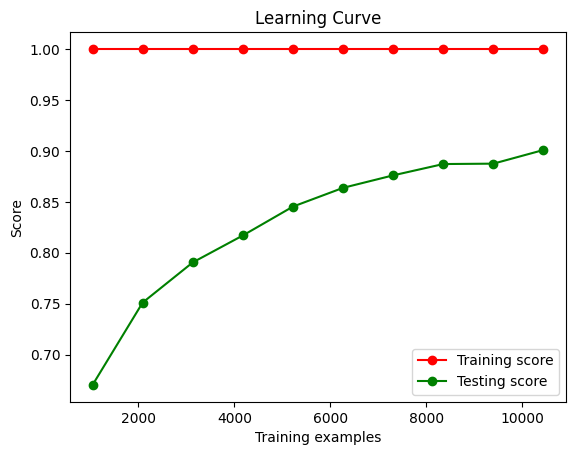

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer les scores d'entraînement et de test pour différentes tailles de l'ensemble de données d'entraînement
def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, train_sizes):
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]

        estimator.fit(X_train_subset, y_train_subset)

        train_score = estimator.score(X_train_subset, y_train_subset)
        test_score = estimator.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return train_scores, test_scores

# Tailles des sous-ensembles d'entraînement à utiliser
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_pca)
train_sizes = train_sizes.astype(int)

# Calcul des scores
train_scores, test_scores = plot_learning_curve(best_svm, X_train_pca, y_train, X_test_pca, y_test, train_sizes)

# Visualisation des scores
plt.figure()
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores, 'o-', color="g", label="Testing score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.title('Learning Curve')
plt.show()


Tracé des courbes ROC pour chaque classe avec annotation des points les plus proches de (0,1)

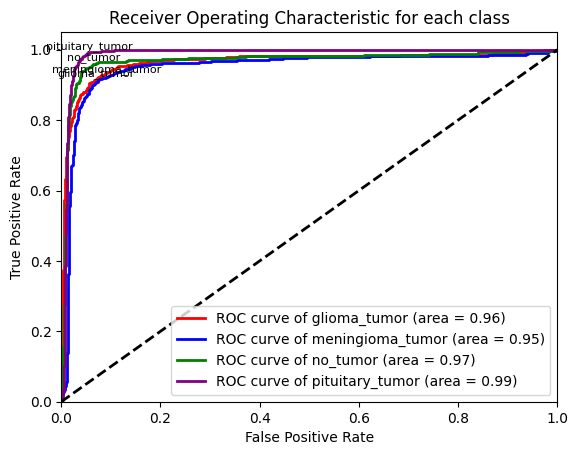

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Binarisation des labels de test
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Utilisation de OneVsRestClassifier avec votre meilleur modèle SVM
classifier = OneVsRestClassifier(best_svm)
y_score = classifier.fit(X_train_pca, y_train).decision_function(X_test_pca)

# Initialisation des variables pour les courbes ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Couleurs pour chaque classe
colors = cycle(['red', 'blue', 'green', 'purple'])

# Calcul des courbes ROC et des aires sous la courbe (AUC) pour chaque classe
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Noms des classes
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Tracé des courbes ROC
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))
    # Trouver le point où la courbe ROC est proche de (0,1) pour placer l'annotation
    idx = np.argmin(np.abs(fpr[i] - 0) + np.abs(tpr[i] - 1))
    plt.annotate(class_names[i], (fpr[i][idx], tpr[i][idx]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()
